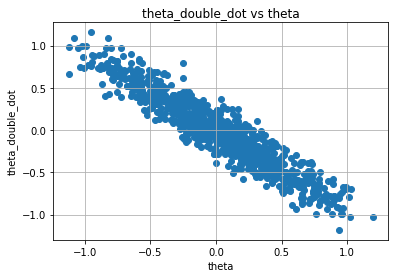

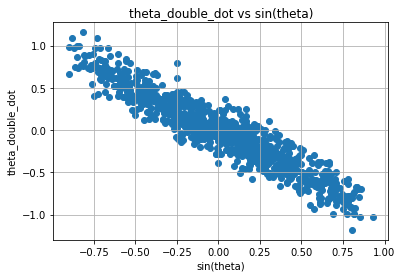

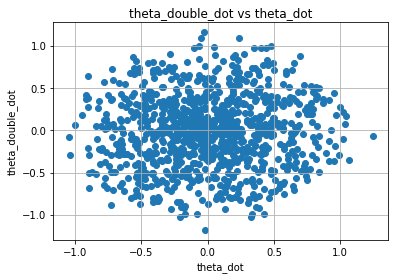

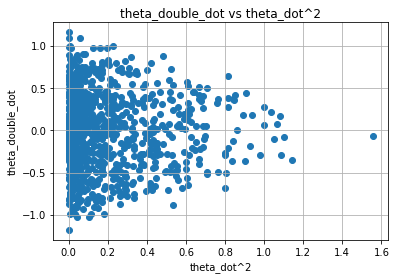

In [57]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv('eb62728e5ff5e83aa1b18dc5ba6013c7e77991874010571016b12559e17b676d_pendulum_data.csv')
var_y = 'theta_double_dot'

for var_x in data.columns:
    if var_x != var_y:
        plt.scatter(data[var_x], data[var_y])
        plt.xlabel(var_x)
        plt.ylabel(var_y)
        plt.title(f'{var_y} vs {var_x}')
        plt.grid(True)
        plt.show()

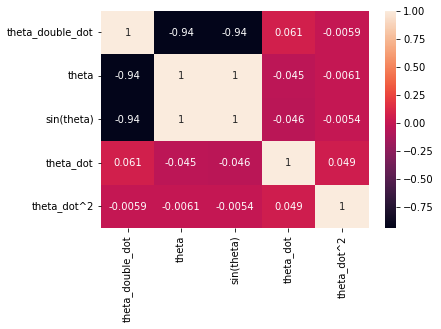

In [58]:
corr_matrix = data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

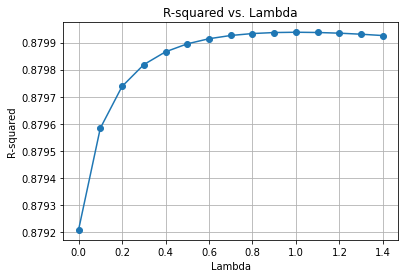

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

var_X = ['theta','sin(theta)']
y = data[var_y]
X = data[var_X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lambdas = np.arange(0, 1.5, 0.1)
r2 = []
w = []
bias = []

for l in lambdas:
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2_lambda = r2_score(y_test, y_pred)
    r2.append(r2_lambda)
    w.append(ridge_model.coef_)
    bias.append(ridge_model.intercept_)

plt.plot(lambdas, r2, marker='o')
plt.title("R-squared vs. Lambda")
plt.xlabel("Lambda")
plt.ylabel("R-squared")
plt.grid(True)
plt.show()

In [60]:
r2_maxi = np.argmax(r2)
r2_max = r2[r2_maxi]
lambda_opt = lambdas[r2_maxi]
w_opt = w[r2_maxi]

print(f"Optimum lambda = {lambda_opt}")
print(f"R-squared = {r2_max}")
print(f"w0 = {bias[r2_maxi]}, w1 = {w_opt[0]}, w2 = {w_opt[1]}")

Optimum lambda = 1.0
R-squared = 0.8799384868175187
w0 = -0.008836076133253708, w1 = -0.533341060956239, w2 = -0.4065148867027883
